# Kennedy Fletcher

## Research question/interests

I want to look at what country has the most points of all time, as well as what driver has had the best season of all time. 

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns #Understanding my variables
import csv

In [2]:
print(pd.__version__)

1.3.2


In [3]:
f1data = pd.read_csv("../f1data.csv")

In [4]:
f1data

,Pos,Driver,Nationality,Car,PTS,Year
0,1,Nino Farina FAR,ITA,Alfa Romeo,30.0,1950
1,2,Juan Manuel Fangio FAN,ARG,Alfa Romeo,27.0,1950
2,3,Luigi Fagioli FAG,ITA,Alfa Romeo,24.0,1950
3,4,Louis Rosier ROS,FRA,Talbot-Lago,13.0,1950
4,5,Alberto Ascari ASC,ITA,Ferrari,11.0,1950
...,...,...,...,...,...,...
1568,17,Kevin Magnussen MAG,DEN,Haas Ferrari,1.0,2020
1569,18,Kimi RÃ¤ikkÃ¶nen RAI,FIN,Alfa Romeo Racing Ferrari,0.0,2020
1570,19,Nicholas Latifi LAT,CAN,Williams Mercedes,0.0,2020
1571,20,George Russell RUS,GBR,Williams Mercedes,0.0,2020


In [5]:
## Milestone 3 Task 1 (EDA)

In [6]:
f1data.shape

(1573, 6)

In [7]:
## so there are 1573 rows and 6 columns

In [8]:
f1data.columns

Index(['Pos', 'Driver', 'Nationality', 'Car', 'PTS', 'Year'], dtype='object')

In [9]:
f1data.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,PTS,Year
count,1573.000000,1573.000000
mean,27.207883,1985.148760
std,52.585197,20.744311
min,0.000000,1950.000000
25%,3.000000,1967.000000
50%,8.000000,1985.000000
75%,28.000000,2004.000000
max,413.000000,2020.000000


<AxesSubplot:xlabel='Pos', ylabel='PTS'>

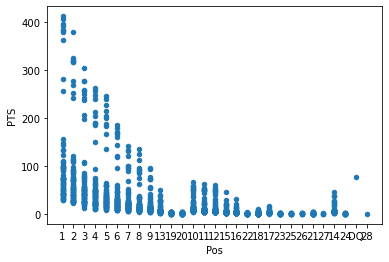

In [11]:
f1data.plot(kind='scatter', x='Pos', y='PTS',figsize=(15,5))

<AxesSubplot:ylabel='Frequency'>

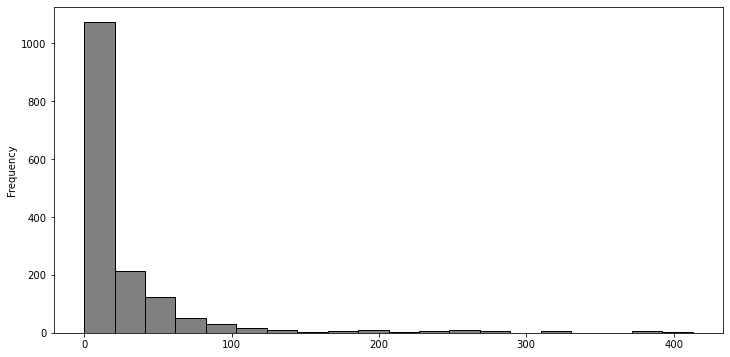

In [12]:
f1data['PTS'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black')

<AxesSubplot:xlabel='Year', ylabel='PTS'>

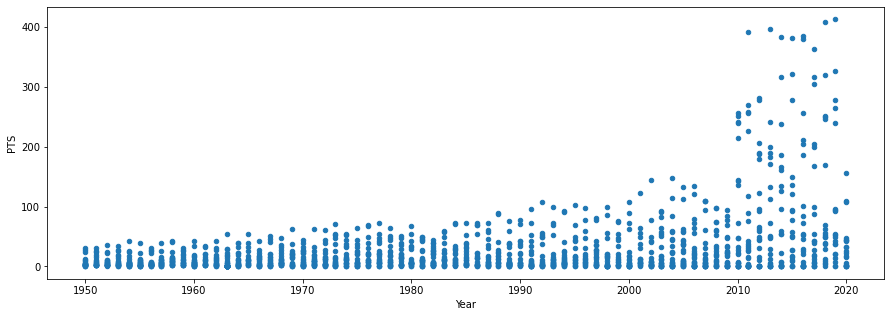

In [13]:
f1data.plot(kind='scatter', x='Year', y='PTS',figsize=(15,5))

<AxesSubplot:xlabel='Nationality', ylabel='PTS'>

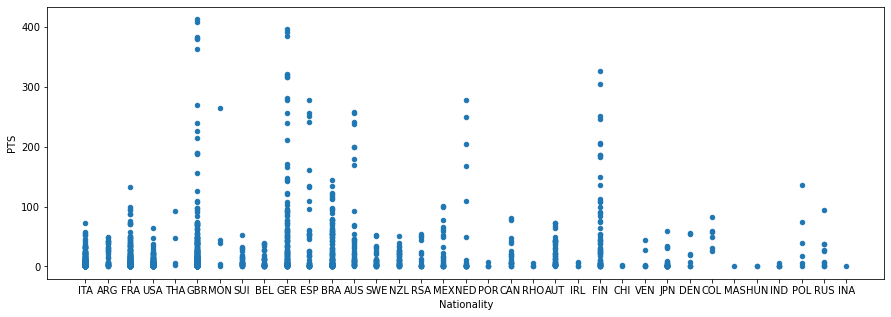

In [14]:
f1data.plot(kind='scatter', x='Nationality', y='PTS',figsize=(15,5))

In [15]:
def top5(df):
    """Given dataframe, generate top 5 unique values for non-numeric data"""
    columns = df.select_dtypes(include=['object', 'category']).columns
    for col in columns:
        print("Top 5 unique values of " + col)
        print(df[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(df[col].value_counts()))])
        print(" ")

In [16]:
top5(f1data)

Top 5 unique values of Pos
  Pos  Count
0  18     95
1  15     79
2  13     79
3  12     76
4   6     75
 
Top 5 unique values of Driver
                   Driver  Count
0  Rubens Barrichello BAR     19
1  Michael Schumacher MSC     19
2    Kimi RÃ¤ikkÃ¶nen RAI     18
3       Jenson Button BUT     17
4    Riccardo Patrese PAT     16
 
Top 5 unique values of Nationality
  Nationality  Count
0         GBR    285
1         ITA    192
2         FRA    177
3         USA    133
4         GER    130
 
Top 5 unique values of Car
                Car  Count
0           Ferrari    197
1           Renault     48
2               BRM     44
3        Lotus Ford     43
4  McLaren Mercedes     43
 


In [17]:
# task 2

In [29]:
#checking the delimiter
sniffer = csv.Sniffer()
dialect = sniffer.sniff("first, second, third, fourth")
print(dialect.delimiter)

,


In [18]:
#changing column names
f1data.rename(columns={"Car":"Team","Pos":"Position","PTS":"Points"}, inplace=True)

In [19]:
#checking for null values
f1data.isnull().any(axis=None)
print("Preview of data with null values:")
print(f1data[f1data.isnull().any(axis=1)])

Preview of data with null values:
    Position                  Driver Nationality Team  Points  Year
16        13     Dorino Serafini SER         ITA  NaN     3.0  1950
17        13  Philippe Etancelin ETA         FRA  NaN     3.0  1950
21        20      Eugene Chaboud CHA         FRA  NaN     1.0  1950
35        12        Louis Rosier ROS         FRA  NaN     3.0  1951
53        13         Ken Wharton WHA         GBR  NaN     3.0  1952
309       18      Masten Gregory GRE         USA  NaN     0.0  1963
314       18       Mike Hailwood HAI         GBR  NaN     0.0  1963
446       13     Richard Attwood ATT         GBR  NaN     3.0  1969
478        2     Ronnie Peterson PET         SWE  NaN    33.0  1971
492       16        Mark Donohue DON         USA  NaN     4.0  1971
493       16     Henri Pescarolo PES         FRA  NaN     4.0  1971


In [20]:
#removing null values
f1data["Team"].fillna("Independent", inplace = True)

In [21]:
#changing kimi's name
f1data['Driver'] = f1data['Driver'].replace(['Kimi RÃ¤ikkÃ¶nen RAI'],'Kimi Räikkönen RAI')
i=f1data[f1data['Driver']=='Kimi Räikkönen RAI']

In [22]:
#separating the driver id off of the Driver name, and adding it to a new column
f1data["Driver ID"] = f1data["Driver"].str[-3:]
f1data["Driver2"] = f1data["Driver"].str[:-3]
f1data = f1data.drop(columns=["Driver"])
f1data.rename(columns={"Driver2": "Driver"}, inplace=True)
f1data = f1data[["Driver", "Driver ID", "Team", "Nationality", "Points", "Position", "Year"]]
f1data

,Driver,Driver ID,Team,Nationality,Points,Position,Year
0,Nino Farina,FAR,Alfa Romeo,ITA,30.0,1,1950
1,Juan Manuel Fangio,FAN,Alfa Romeo,ARG,27.0,2,1950
2,Luigi Fagioli,FAG,Alfa Romeo,ITA,24.0,3,1950
3,Louis Rosier,ROS,Talbot-Lago,FRA,13.0,4,1950
4,Alberto Ascari,ASC,Ferrari,ITA,11.0,5,1950
...,...,...,...,...,...,...,...
1568,Kevin Magnussen,MAG,Haas Ferrari,DEN,1.0,17,2020
1569,Kimi Räikkönen,RAI,Alfa Romeo Racing Ferrari,FIN,0.0,18,2020
1570,Nicholas Latifi,LAT,Williams Mercedes,CAN,0.0,19,2020
1571,George Russell,RUS,Williams Mercedes,GBR,0.0,20,2020


In [23]:
#checking for any duplicate entries 
if len(f1data[f1data.duplicated()]) > 0:
    print("Number of duplicated entries: ", len(f1data[f1data.duplicated()]))
    display(f1data[f1data.duplicated(keep=False)].sort_values(by=list(f1data.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


In [24]:
# task 3

In [42]:
def load_and_process(url_or_path_to_csv_file):

    # Method Chain 1 (Load data and deal with missing data)

    df1 = (
          pd.read_csv(url_or_path_to_csv_file)
          .rename(columns={"Car":"Team","Pos":"Position","PTS":"Points"}, inplace=True)
          .fillna("Independent", inplace = True)
          .replace(['Kimi RÃ¤ikkÃ¶nen RAI'],'Kimi Räikkönen RAI')
      )

    # Method Chain 2 (Create new columns, drop others, and do processing)

    df2 = (
          df1
          .assign(...)
      )

    # Make sure to return the latest dataframe

    return df2 


In [43]:
load_and_process("../f1data.csv")

In [25]:
#make function to change column names
f1data.rename(columns={"Car":"Team"}, inplace=True)

#replacing the null values in teams with independent
def replace_null_values(df):
    f1data["Team"].fillna("Independent", inplace = True)

#changing kimi's name 
f1data['Driver'] = f1data['Driver'].replace(['Kimi RÃ¤ikkÃ¶nen RAI'],'Kimi Räikkönen RAI')
i=f1data[f1data['Driver']=='Kimi Räikkönen RAI']

def check_duplicate_entries(df):
    # generate count statistics of duplicate entries
    if len(df[df.duplicated()]) > 0:
        print("Number of duplicated entries: ", len(df[df.duplicated()]))
        display(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)).head())
    else:
        print("No duplicated entries found")


In [26]:
#checking to make sure that the null value changed to independent
f1data.loc[16,:]


Driver         Dorino Serafini 
Driver ID                   SER
Team                Independent
Nationality                 ITA
Points                      3.0
Position                     13
Year                       1950
Name: 16, dtype: object